In [1]:
import pandas as pd
import numpy as np

In [2]:
fn = pd.read_csv('fake_news.csv')
fn.head()

,title,text,date,category
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,"December 31, 2017",TRUE
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,"December 29, 2017",TRUE
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,"December 31, 2017",TRUE
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,"December 30, 2017",TRUE
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,"December 29, 2017",TRUE


In [3]:
# information of the dataset
fn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44890 entries, 0 to 44889
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     44882 non-null  object
 1   text      44882 non-null  object
 2   date      44880 non-null  object
 3   category  44880 non-null  object
dtypes: object(4)
memory usage: 1.4+ MB


In [4]:
#checking null items in the dataset
fn.isna().sum()

title        8
text         8
date        10
category    10
dtype: int64

In [5]:
# title and date both column are dropped
fn.dropna(subset=['title'], inplace=True)
fn.dropna(subset=['date'], inplace=True)          

In [6]:
#removed all the null items
fn.isna().sum()

title       0
text        0
date        0
category    0
dtype: int64

In [7]:
#checking for the duplicate items in the dataset
duplicate = fn['title'].duplicated()
print(duplicate)

0        False
1        False
2        False
3        False
4        False
         ...  
44885     True
44886     True
44887     True
44888     True
44889     True
Name: title, Length: 44880, dtype: bool


In [8]:
#deleting all the duplicate items from the dataset
fn = fn.drop_duplicates(subset=['title'], keep='first')
print(fn)

                                                   title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
44115  The White House and The Theatrics of ‘Gun Cont...   
44116  Activists or Terrorists? How Media Controls an...   
44117  BOILER ROOM – No Surrender, No Retreat, Heads ...   
44118  Federal Showdown Looms in Oregon After BLM Abu...   
44119  A Troubled King: Chicago’s Rahm Emanuel Desper...   

                                                    text                date  \
0      WASHINGTON (Reuters) - The head of a conservat...  December 31, 2017    
1      WASHINGTON (Reuters) - Transgender people will...  December 29, 2017    
2      WASHINGTON (Reuters) - The speci

In [9]:
#checking for any duplicate row left
duplicate = fn['title'].duplicated()
print("Duplicated rows:",duplicate.sum())
print(duplicate)

Duplicated rows: 0
0        False
1        False
2        False
3        False
4        False
         ...  
44115    False
44116    False
44117    False
44118    False
44119    False
Name: title, Length: 38720, dtype: bool


In [10]:
# shape function will give the total no. of rows and columns in dataset
fn.shape

(38720, 4)

In [11]:
fn.head()

,title,text,date,category
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,"December 31, 2017",TRUE
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,"December 29, 2017",TRUE
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,"December 31, 2017",TRUE
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,"December 30, 2017",TRUE
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,"December 29, 2017",TRUE


In [12]:
fn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38720 entries, 0 to 44119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     38720 non-null  object
 1   text      38720 non-null  object
 2   date      38720 non-null  object
 3   category  38720 non-null  object
dtypes: object(4)
memory usage: 1.5+ MB


## Converting column data to lowercase

In [13]:
# Converting all the columns data to lowercase
fn['title'] = fn['title'].str.lower()
fn['text'] = fn['text'].str.lower()
fn['date'] = fn['date'].str.lower()
fn['category'] = fn['category'].str.lower()

In [14]:
fn.head()

,title,text,date,category
0,"as u.s. budget fight looms, republicans flip t...",washington (reuters) - the head of a conservat...,"december 31, 2017",true
1,u.s. military to accept transgender recruits o...,washington (reuters) - transgender people will...,"december 29, 2017",true
2,senior u.s. republican senator: 'let mr. muell...,washington (reuters) - the special counsel inv...,"december 31, 2017",true
3,fbi russia probe helped by australian diplomat...,washington (reuters) - trump campaign adviser ...,"december 30, 2017",true
4,trump wants postal service to charge 'much mor...,seattle/washington (reuters) - president donal...,"december 29, 2017",true


## Tokenization

In [15]:
# Performing tokenization step on the dataset
# Tokenization will divide the sentence into the token(word)
import nltk
from nltk.tokenize import word_tokenize

fn['text'] = fn['text'].apply(word_tokenize)
fn['title'] = fn['title'].apply(word_tokenize)

In [16]:
fn.head()

,title,text,date,category
0,"[as, u.s., budget, fight, looms, ,, republican...","[washington, (, reuters, ), -, the, head, of, ...","december 31, 2017",true
1,"[u.s., military, to, accept, transgender, recr...","[washington, (, reuters, ), -, transgender, pe...","december 29, 2017",true
2,"[senior, u.s., republican, senator, :, 'let, m...","[washington, (, reuters, ), -, the, special, c...","december 31, 2017",true
3,"[fbi, russia, probe, helped, by, australian, d...","[washington, (, reuters, ), -, trump, campaign...","december 30, 2017",true
4,"[trump, wants, postal, service, to, charge, 'm...","[seattle/washington, (, reuters, ), -, preside...","december 29, 2017",true


In [17]:
# Removing the punctuation mark and some special characters
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [18]:
def remove_function(text):
    if isinstance(text, list):
        text = ' '.join(text)  # Join list elements into a single string
    punctuations = string.punctuation
    return text.translate(str.maketrans('', '', punctuations))

In [20]:
# Removing punctuation
fn['text']=fn['text'].apply(lambda x:remove_function(x))
fn['title'] = fn['title'].apply(lambda x:remove_function(x))
fn.head()

,title,text,date,category
0,as us budget fight looms republicans flip the...,washington reuters the head of a conservati...,"december 31, 2017",true
1,us military to accept transgender recruits on ...,washington reuters transgender people will ...,"december 29, 2017",true
2,senior us republican senator let mr mueller d...,washington reuters the special counsel inve...,"december 31, 2017",true
3,fbi russia probe helped by australian diplomat...,washington reuters trump campaign adviser g...,"december 30, 2017",true
4,trump wants postal service to charge much more...,seattlewashington reuters president donald ...,"december 29, 2017",true


## Stopwords

In [21]:
from nltk.corpus import stopwords
",".join(stopwords.words('english'))

"i,me,my,myself,we,our,ours,ourselves,you,you're,you've,you'll,you'd,your,yours,yourself,yourselves,he,him,his,himself,she,she's,her,hers,herself,it,it's,its,itself,they,them,their,theirs,themselves,what,which,who,whom,this,that,that'll,these,those,am,is,are,was,were,be,been,being,have,has,had,having,do,does,did,doing,a,an,the,and,but,if,or,because,as,until,while,of,at,by,for,with,about,against,between,into,through,during,before,after,above,below,to,from,up,down,in,out,on,off,over,under,again,further,then,once,here,there,when,where,why,how,all,any,both,each,few,more,most,other,some,such,no,nor,not,only,own,same,so,than,too,very,s,t,can,will,just,don,don't,should,should've,now,d,ll,m,o,re,ve,y,ain,aren,aren't,couldn,couldn't,didn,didn't,doesn,doesn't,hadn,hadn't,hasn,hasn't,haven,haven't,isn,isn't,ma,mightn,mightn't,mustn,mustn't,needn,needn't,shan,shan't,shouldn,shouldn't,wasn,wasn't,weren,weren't,won,won't,wouldn,wouldn't"

In [22]:
STOPWORDS=set(stopwords.words('english'))
def remove_stopwords(text):
  return " ".join([word for word in text.split() if word not in STOPWORDS])

In [23]:
# Removing the stopwords
fn['text']=fn['text'].apply(lambda x:remove_stopwords(x))
fn['title']=fn['title'].apply(lambda x:remove_stopwords(x))

fn.head()

,title,text,date,category
0,us budget fight looms republicans flip fiscal ...,washington reuters head conservative republica...,"december 31, 2017",true
1,us military accept transgender recruits monday...,washington reuters transgender people allowed ...,"december 29, 2017",true
2,senior us republican senator let mr mueller job,washington reuters special counsel investigati...,"december 31, 2017",true
3,fbi russia probe helped australian diplomat ti...,washington reuters trump campaign adviser geor...,"december 30, 2017",true
4,trump wants postal service charge much amazon ...,seattlewashington reuters president donald tru...,"december 29, 2017",true


## Stemming

In [25]:
# Performing stemming on the dataset
# Stemming is the process that removes the last few characters from the word, often leading to incorrect meaning.
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
ps=PorterStemmer()
wnl =  WordNetLemmatizer()

In [26]:
# Stemming function
def stemm(text):
    return ps.stem(text)

# Lemmatization function
def lemmat(text):
    return wnl.lemmatize(text)

In [27]:
fn['title'] = fn['title'].apply(lemmat)
fn['text'] = fn['text'].apply(lemmat)
fn['title'] = fn['title'].apply(stemm)
fn['text'] = fn['text'].apply(stemm)
fn.head()

,title,text,date,category
0,us budget fight looms republicans flip fiscal ...,washington reuters head conservative republica...,"december 31, 2017",true
1,us military accept transgender recruits monday...,washington reuters transgender people allowed ...,"december 29, 2017",true
2,senior us republican senator let mr mueller job,washington reuters special counsel investigati...,"december 31, 2017",true
3,fbi russia probe helped australian diplomat ti...,washington reuters trump campaign adviser geor...,"december 30, 2017",true
4,trump wants postal service charge much amazon ...,seattlewashington reuters president donald tru...,"december 29, 2017",true


In [28]:
fn.to_csv('cleaned_data.csv',index=False)
print("Cleaned data is saved as cleaned_data.csv")

Cleaned data is saved as cleaned_data.csv


In [29]:
cleaned_data = pd.read_csv('cleaned_data.csv')
cleaned_data.head()

,title,text,date,category
0,us budget fight looms republicans flip fiscal ...,washington reuters head conservative republica...,"december 31, 2017",true
1,us military accept transgender recruits monday...,washington reuters transgender people allowed ...,"december 29, 2017",true
2,senior us republican senator let mr mueller job,washington reuters special counsel investigati...,"december 31, 2017",true
3,fbi russia probe helped australian diplomat ti...,washington reuters trump campaign adviser geor...,"december 30, 2017",true
4,trump wants postal service charge much amazon ...,seattlewashington reuters president donald tru...,"december 29, 2017",true


In [30]:
import matplotlib.pyplot as plt
fn['category'].unique()

array(['true', 'fake'], dtype=object)

In [31]:
fn['category'].value_counts()

category
true    20826
fake    17894
Name: count, dtype: int64

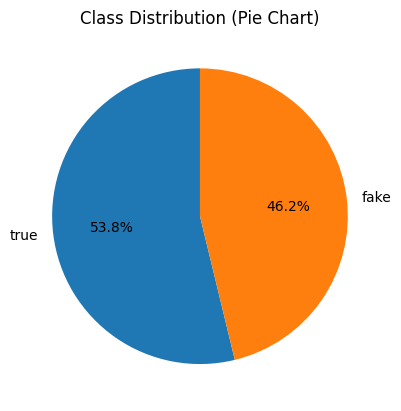

In [32]:
class_counts = fn['category'].value_counts()

# Plot Pie Chart for Balance Check
# plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Class Distribution (Pie Chart)')
plt.show()

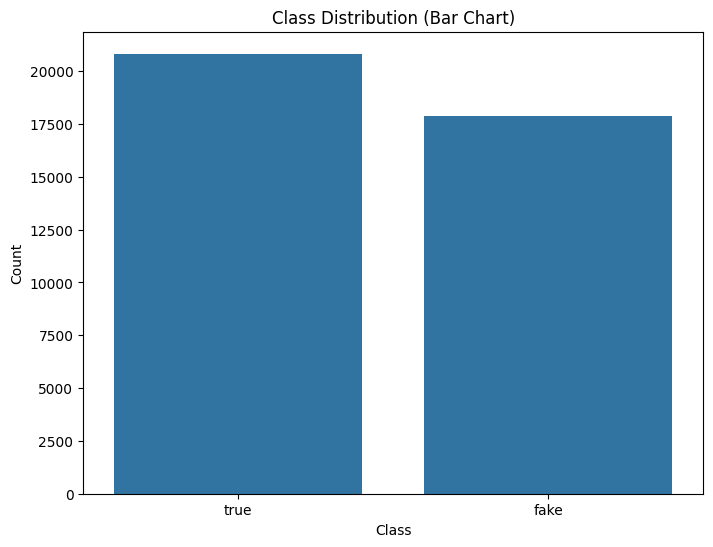

In [33]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Class Distribution (Bar Chart)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()